In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("green_energy_dataset.csv")

# Parte 1 – Compreensão inicial do problema

In [ ]:
data.head()

,Building_Type,Year_Built,Floor_Area_m2,Orientation,Material,Insulation_Level,Solar_Potential_kWh_m2,Wind_Potential_m_s,Geothermal_Potential,Energy_Demand_kWh,Installation_Area_m2,Carbon_Reduction_%,Payback_Period_Years,Optimal_Solar_Utilization_%
0,Stone_Villa,1844,67,East,Stone,Medium,4.962383,2.202131,1.232814,8740,78,25.377517,11.399095,22.983017
1,Thatched_Hut,1900,89,North,Timber,High,4.914787,4.494622,1.286294,5358,34,26.925844,8.824947,7.357229
2,Wooden_House,1911,70,North,Timber,Medium,4.709916,2.531980,1.500403,8777,29,24.824728,7.493479,11.280055
3,Stone_Villa,1919,192,North,Brick,Low,7.401493,4.169215,0.900716,10906,60,31.956198,5.050910,16.585626
4,Stone_Villa,1939,274,West,Brick,Low,4.180462,4.318013,1.865997,15563,46,21.513738,5.426386,10.145989


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Building_Type                1000 non-null   object 
 1   Year_Built                   1000 non-null   int64  
 2   Floor_Area_m2                1000 non-null   int64  
 3   Orientation                  1000 non-null   object 
 4   Material                     1000 non-null   object 
 5   Insulation_Level             1000 non-null   object 
 6   Solar_Potential_kWh_m2       1000 non-null   float64
 7   Wind_Potential_m_s           1000 non-null   float64
 8   Geothermal_Potential         1000 non-null   float64
 9   Energy_Demand_kWh            1000 non-null   int64  
 10  Installation_Area_m2         1000 non-null   int64  
 11  Carbon_Reduction_%           1000 non-null   float64
 12  Payback_Period_Years         1000 non-null   float64
 13  Optimal_Solar_Utili

**Solar_Potential_kWh_m2**:

É a medida mais direta sobre o potencial de geração de energia da edificação. Quanto maior esse valor maior a produção esperada de energia solar por metro quadrado e, portanto, maior a viabilidade técnica e economica da instalação de paineis solares.

**Energy_Demand_kWh**:

Indica o consumo de energia da edificação. Se a demanda for alta e a insolação do local tiver um nível elevado, a instalação pode gerar economia significativa na conta de energia.

**Payback_Period_Years**:

È um indicador direto da viabilidade econômica de um possível projeto de geração de energia solar.

**Carbon_Reduction_**%:

Importante especialmente para empresas ou projetos com metas de sustentabilidade. Pode influenciar a decisão mesmo quando o retorno financeiro é demorado.

**Insulation_Level**

Indica o nível do isolamento térmico da residência/edificação. Quanto menor o nível de isolamento térmico provavelmente maior será o consumo de energia, principalmente em locais frios.


# Parte 2 – Visualização dos dados

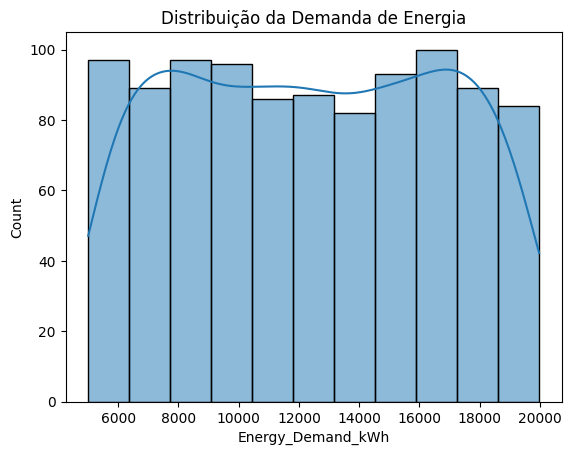

In [ ]:
sns.histplot(data, x="Energy_Demand_kWh",kde=True)
plt.title("Distribuição da Demanda de Energia")
plt.show()

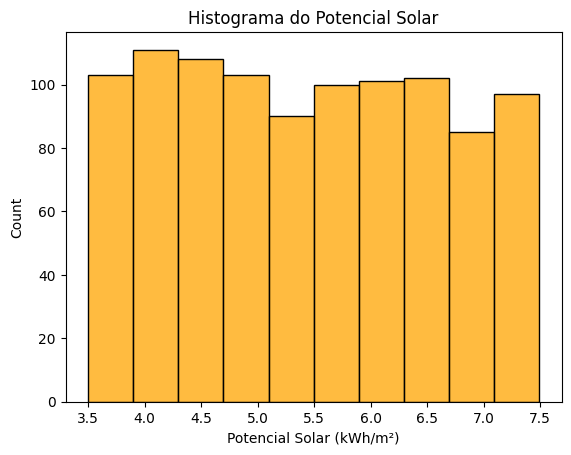

In [ ]:
sns.histplot(data['Solar_Potential_kWh_m2'],bins = 10,color='orange')
plt.xlabel('Potencial Solar (kWh/m²)')
plt.title('Histograma do Potencial Solar')
plt.show()

<ipython-input-8-1407420556>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=media_energiaIso, x="Insulation_Level", y="Energy_Demand_kWh", palette="magma")


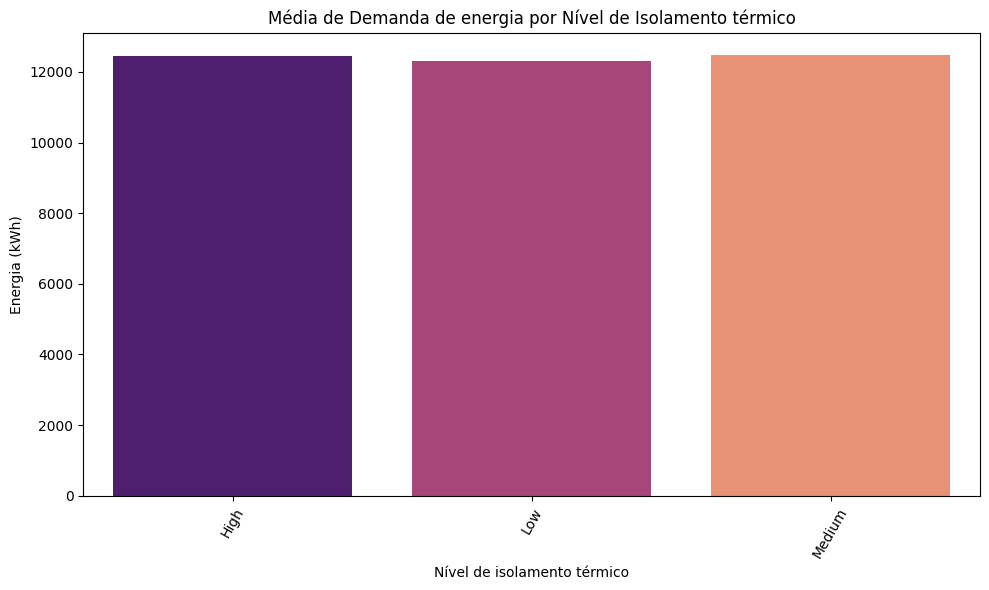

In [ ]:
media_energiaIso = data.groupby("Insulation_Level")["Energy_Demand_kWh"].mean().reset_index()


plt.figure(figsize=(10, 6))
sns.barplot(data=media_energiaIso, x="Insulation_Level", y="Energy_Demand_kWh", palette="magma")

plt.title("Média de Demanda de energia por Nível de Isolamento térmico")
plt.ylabel("Energia (kWh)")
plt.xlabel("Nível de isolamento térmico")
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

<ipython-input-9-353401072>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=media_energiaBui, x="Building_Type", y="Energy_Demand_kWh", palette="viridis")


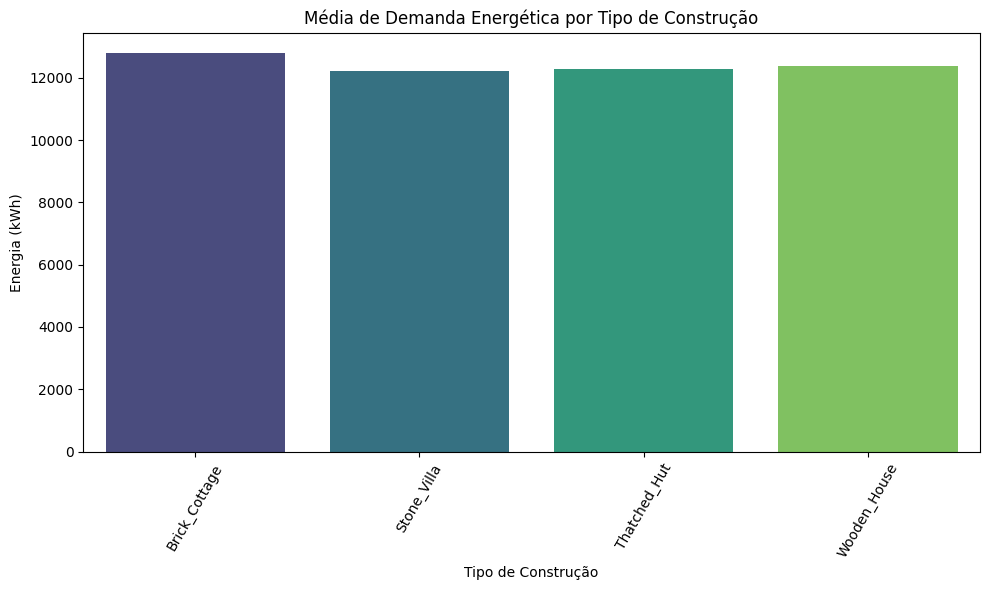

In [ ]:
media_energiaBui = data.groupby("Building_Type")["Energy_Demand_kWh"].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=media_energiaBui, x="Building_Type", y="Energy_Demand_kWh", palette="viridis")

plt.title("Média de Demanda Energética por Tipo de Construção")
plt.ylabel("Energia (kWh)")
plt.xlabel("Tipo de Construção")
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

In [ ]:
data.describe()

,Year_Built,Floor_Area_m2,Solar_Potential_kWh_m2,Wind_Potential_m_s,Geothermal_Potential,Energy_Demand_kWh,Installation_Area_m2,Carbon_Reduction_%,Payback_Period_Years,Optimal_Solar_Utilization_%
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1846.76400,174.076000,5.445767,3.474329,1.247312,12412.31100,60.952000,25.048241,8.456883,15.747852
std,88.64779,72.654559,1.155315,0.863068,0.439796,4334.90683,23.218458,8.829920,1.994067,5.537607
min,1700.00000,50.000000,3.500746,2.002788,0.500941,5002.00000,20.000000,10.040666,5.007920,1.785391
25%,1768.75000,110.500000,4.459111,2.729943,0.855990,8415.50000,41.000000,17.597244,6.765935,11.562933
50%,1847.50000,177.500000,5.409594,3.462186,1.252845,12322.50000,62.000000,24.867297,8.517913,15.817185
75%,1925.00000,237.000000,6.447225,4.235145,1.602956,16276.00000,80.000000,32.839639,10.111019,19.984766
max,1999.00000,299.000000,7.490491,4.997148,1.999774,19974.00000,99.000000,39.992238,11.996474,28.172355


**Padrão**: Os dados parecem estar bem distribuídos. Por exemplo, no primeiro barplot que compara o nível de isolamento térmico da residência com o consumo de energia, não há um aumento no consumo de energia conforme o nível de isolamento térmico diminui, isso, no entanto, pode ser influenciado por outros fatores. Parece que os dados foram gerados com base em algo semelhante a uma Distribuição Uniforme.

# Parte 3 – Explorando Relações entre colunas com Pair Plot

In [ ]:
data_Opt_Area = data[["Optimal_Solar_Utilization_%","Installation_Area_m2"]]

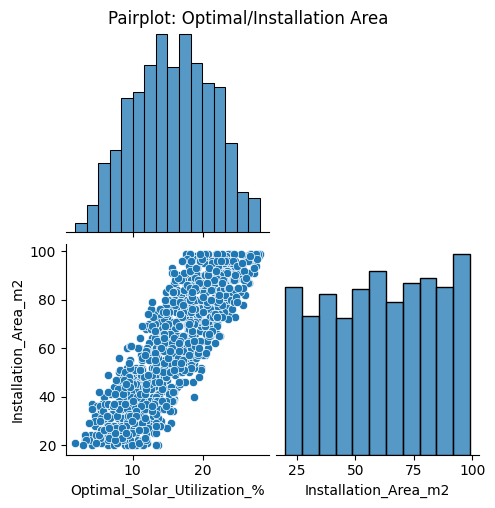

In [ ]:
sns.pairplot(data_Opt_Area,corner=True,)
plt.suptitle("Pairplot: Optimal/Installation Area",y=1.00)
plt.show()

**Relação**:Sim! Com uma área maior disponível, as placas solares podem ser instaladas em angulos e direções corretas, otimizando o desempenho do sistema.
Garantindo uma maior geração de energia e consequentemente, um payback mais rápido. Assim,essa correlação é lógica e esperada

# Parte 4 – Explorando relações entre outras colunas

In [ ]:
data_Energy_Floor = data[["Energy_Demand_kWh","Floor_Area_m2"]]

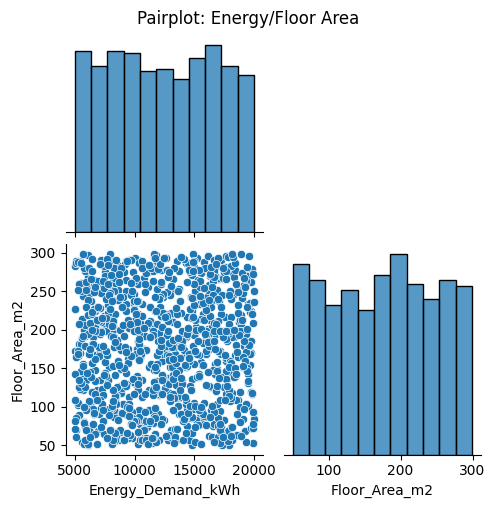

In [ ]:
sns.pairplot(data_Energy_Floor,corner=True)
plt.suptitle("Pairplot: Energy/Floor Area",y=1.00)
plt.show()

**Relação**:Não! Com uma área maior da residência era se esperado uma maior demanda de energia.No entanto, o gráfico gerado está bem disperso,sem indicar uma correlação clara entre essas variáveis .Portanto, a relação esperada não se confirmou na visualização.

# Parte 5 – Reflexão final sobre o dataset

**Conclusão**

Depois de analisar o dataset, tudo sugere que ele foi gerado artificialmente utilizando Distribuição Uniforme, e não coletado com pesquisas em residências reais. As variáveis categóricas, por exemplo, não tem um efeito esperado nos dados , quase como se tivessem sido balanceadas intencionalmente, como no barplot da média de demanda térmica por nível de isolamentoo térmico da residência,o que dificilmente aconteceria em um dataset com dados reais.

No entanto, trata-se de um dataset bem completo e que se tivesse sido recolhido com dados reais, seria bastante útil para compreender como diferentes variáveis podem afetar o funcionamento e viabilidade de um projeto de energia solar.  